In [1]:
import numpy as np
import pandas as pd
from sklearn import datasets # sklearn comes with some toy datasets to practise
from sklearn.preprocessing import StandardScaler

from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score

from sklearn.datasets import make_classification
from sklearn.cluster import DBSCAN
from sklearn.metrics import silhouette_score, calinski_harabasz_score
from kneed import KneeLocator
import matplotlib.pyplot as plt
import seaborn as sns
import colorcet as cc
import time
import pickle

In [2]:
df = pd.read_csv('all_songs_with_features.csv', sep=";") 


In [3]:
df

,song,artist,id,danceability,energy,speechiness,acousticness,instrumentalness,valence,database
0,Still Remains,Stone Temple Pilots,0vDSbxxAm67GWHYueykkpc,0.378,0.912,0.0433,0.00442,0.000002,0.531,not_hot_songs
1,He Believes In You,Point Of Grace,5ggOAMsJCAYDHnyoqJ0xAD,0.320,0.413,0.0314,0.48400,0.000005,0.313,not_hot_songs
2,Bad Omen,Megadeth,1H4Y9uW4N0LsxJUz0VnaPJ,0.457,0.834,0.0817,0.00252,0.001250,0.201,not_hot_songs
3,Classic Rock,Kid Rock,1dQoeGebjHr6hImahGIsmT,0.743,0.349,0.0875,0.89700,0.804000,0.862,not_hot_songs
4,"Fat Boy Slim - Right Here, Right Now",Fatboy Slim,3Pb9QabepyR9e9D8NqorPH,0.572,0.862,0.1010,0.01270,0.388000,0.111,not_hot_songs
...,...,...,...,...,...,...,...,...,...,...
2132,Standing Room Only,Tim McGraw,6BOP0cv1eeXcvi1oE8bDVZ,0.475,0.789,0.0380,0.17000,0.000000,0.485,hot_songs
2133,Checkmate,Rod Wave,6VdBDm20nkyk6A29P785aJ,0.731,0.622,0.0979,0.17600,0.000000,0.445,hot_songs
2134,Can't Have Mine,Dylan Scott,3jfywRZH6cB2iLyKqo4EZd,0.663,0.502,0.0285,0.79100,0.000000,0.371,hot_songs
2135,On My Mama,Victoria Monet,1o8Z7GD1CeOaVBEyuzu4HO,0.481,0.539,0.1080,0.55100,0.005390,0.621,hot_songs


In [4]:
#reducing the number of features to get only relevant ones. Our selection is exeplained in the readme
data=df[["danceability", "energy", "speechiness",  "acousticness", "instrumentalness", "valence"]]

In [5]:
data.isna().sum()

danceability        0
energy              0
speechiness         0
acousticness        0
instrumentalness    0
valence             0
dtype: int64

In [6]:
data.describe()

,danceability,energy,speechiness,acousticness,instrumentalness,valence
count,2137.000000,2137.000000,2137.000000,2137.000000,2137.000000,2137.000000
mean,0.569577,0.594131,0.067205,0.311529,0.068230,0.548472
std,0.158107,0.234342,0.069775,0.306568,0.202763,0.249349
min,0.121000,0.000981,0.022600,0.000004,0.000000,0.000010
25%,0.474000,0.429000,0.032000,0.039300,0.000000,0.354000
50%,0.578000,0.616000,0.040600,0.201000,0.000029,0.557000
75%,0.679000,0.783000,0.065300,0.535000,0.003200,0.748000
max,0.979000,0.997000,0.592000,0.996000,0.993000,0.980000


In [7]:
#scaling the data
scaler = StandardScaler()
scaler.fit(data)
data_scaled = scaler.transform(data)
filename = "data_scaler.pickle" # Path with filename

with open(filename, "wb") as file:
        pickle.dump(scaler,file)

data_scaled_df = pd.DataFrame(data_scaled, columns = data.columns)
display(data.head())
print()
display(data_scaled_df.head())
data_scaled_df.to_csv("Data_scaled.csv", sep=";", index=False)

,danceability,energy,speechiness,acousticness,instrumentalness,valence
0,0.378,0.912,0.0433,0.00442,0.000002,0.531
1,0.320,0.413,0.0314,0.48400,0.000005,0.313
2,0.457,0.834,0.0817,0.00252,0.001250,0.201
3,0.743,0.349,0.0875,0.89700,0.804000,0.862
4,0.572,0.862,0.1010,0.01270,0.388000,0.111


,danceability,energy,speechiness,acousticness,instrumentalness,valence
0,-1.211973,1.356751,-0.342687,-1.001999,-0.336570,-0.070086
1,-1.578900,-0.773113,-0.513275,0.562719,-0.336554,-0.944566
2,-0.712195,1.023826,0.207783,-1.008198,-0.330413,-1.393840
3,1.097132,-1.046282,0.290927,1.910206,3.629577,1.257680
4,0.015332,1.143338,0.484452,-0.974984,1.577437,-1.754864


In [36]:
#using PCA
from sklearn.decomposition import PCA

pca = PCA()
pca.fit(data_scaled_df)
principal_components = pca.transform(data_scaled_df)
principal_components_df = pd.DataFrame(principal_components, columns=['PCA_'+ str(i) for i in range(1,data_scaled_df.shape[1]+1)])
principal_components_df.head()

,PCA_1,PCA_2,PCA_3,PCA_4,PCA_5,PCA_6
0,-0.814147,-1.856574,-0.361748,-0.091377,-0.539850,-0.094499
1,1.732197,-0.926278,-0.526633,0.561546,-0.422290,0.216108
2,-0.350754,-1.897694,0.303233,0.686203,0.500561,-0.359699
3,1.441547,2.494282,2.014414,-2.874355,-0.321897,-0.254207
4,-0.107795,-1.633892,1.728041,-0.553362,1.256596,-0.712745


In [37]:
pca.explained_variance_ratio_

array([0.35596534, 0.19063815, 0.16815925, 0.14814627, 0.09622247,
       0.04086853])

As the variance ratio didn't seem satisfying for the 2 first PCAs, I chose to try the other dimensionality reduction techniques

In [38]:
from sklearn.manifold import Isomap

iso = Isomap(n_neighbors=12, n_components=2)
iso.fit(data_scaled_df)
filename = "isomap.pickle" # Path with filename

with open(filename, "wb") as file:
        pickle.dump(scaler,file)
        
D_isomap_transformed = iso.transform(data_scaled_df)
D_isomap_transformed_df = pd.DataFrame(D_isomap_transformed, columns=["ISO_1","ISO_2"])
D_isomap_transformed_df.head()

,ISO_1,ISO_2
0,-0.944596,1.595633
1,2.024451,-0.495464
2,-0.805830,1.131385
3,3.981810,4.207316
4,-0.236375,2.735373


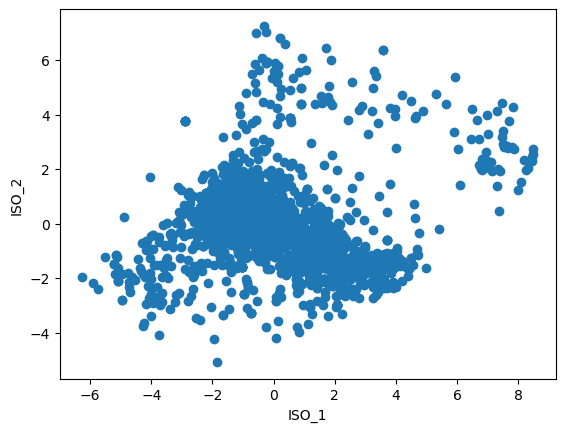

In [39]:
#the dimensionality technique with isomap isn't very satisfying as I can't see obvious clusters forming. I will therefore try with TSNE
fig, ax = plt.subplots()
ax.scatter(D_isomap_transformed_df['ISO_1'],D_isomap_transformed_df['ISO_2'])
ax.set_xlabel("ISO_1")
ax.set_ylabel("ISO_2")
plt.show()

In [17]:
from sklearn.manifold import TSNE

tsne = TSNE(n_components=2, learning_rate=100, init='random', perplexity=50, random_state=12)
filename = "TSNE.pickle" # Path with filename

with open(filename, "wb") as file:
        pickle.dump(scaler,file)
        
D_tsne_transformed = tsne.fit_transform(data_scaled_df)
D_tsne_transformed_df = pd.DataFrame(D_tsne_transformed, columns=["TSNE_1","TSNE_2"])
D_tsne_transformed_df.head()

,TSNE_1,TSNE_2
0,-21.214920,-1.389847
1,3.270362,-28.444855
2,-25.832458,1.879395
3,-30.132511,-29.722939
4,-30.203295,-13.107657


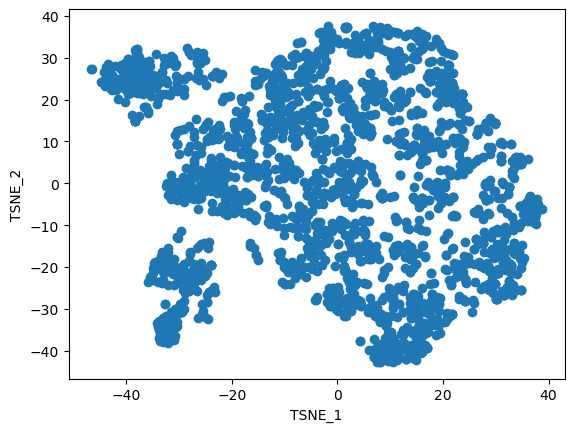

In [18]:
fig, ax = plt.subplots()
ax.scatter(D_tsne_transformed_df['TSNE_1'],D_tsne_transformed_df['TSNE_2'])
ax.set_xlabel("TSNE_1")
ax.set_ylabel("TSNE_2")
plt.show()

The best reduction seems to be the TSNE reduction where we can already see the clusters forming. This is the reduction we will keep

In [28]:
D_tsne_transformed_df.to_csv("Data_TSNE.csv", sep=";", index=False)